In [260]:
# importing liberaries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [261]:
df = pd.read_csv("./insurance.csv")
df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [262]:
# mapping data to integers
def mapping(x):
    if x == 'female':
        return 0
    else:
        return 1

df["smoker"] = df["smoker"].replace(to_replace=["yes", "no"], value=[1, 0], regex=True)
df["smoker"] = df.smoker.astype(int)

# df["sex"] = df["sex"].replace(to_replace=["male", "female"], value=[1, 0], regex=True)
df["sex"] = df["sex"].map(lambda x: mapping(x))
df["sex"] = df.sex.astype(int)

df["region"] = df["region"].replace(to_replace=["northeast", "northwest", "southeast", "southwest"], value=[0, 1, 2, 3], regex=True)
df["region"] = df.region.astype(int)

df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
5,31,0,25.740,0,0,2,3756.62160
6,46,0,33.440,1,0,2,8240.58960
7,37,0,27.740,3,0,1,7281.50560
8,37,1,29.830,2,0,0,6406.41070
9,60,0,25.840,0,0,1,28923.13692


In [263]:
df.dtypes

age           int64
sex           int64
bmi         float64
children      int64
smoker        int64
region        int64
charges     float64
dtype: object

In [264]:
df.describe()

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,1.515695,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.104885,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,0.000000,1.000000,4740.287150
50%,39.000000,1.000000,30.400000,1.000000,0.000000,2.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,2.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010


In [265]:
# checking if there are missing data
# since using df.isna() is not useful so we see the sum
data = df.isna().sum()
data
# for i in range(3):
#     print(data.iloc[i])

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

# Using Z-score to detect outliers

In [266]:
# thershold value of 3
# z = (x - mean) / std

def outliers(data):
    mean = np.mean(data)
    std = np.std(data)
    li = []
    for i in range(len(data)):
        z = (data[i] - mean) / std

        if np.abs(z) > 3:
            li.append(data[i])

    return li

charges_outliers = outliers(df["charges"])
bmi_outliers = outliers(df["bmi"])
age_outliers = outliers(df["age"])
sex_outliers = outliers(df["sex"])
smoker_outliers = outliers(df["smoker"])
children_outliers = outliers(df["children"])
region_outliers = outliers(df["region"])

print(charges_outliers)

[51194.55914, 63770.42801, 58571.07448, 55135.40209, 52590.82939, 60021.39897, 62592.87309]


# Removing outliers from the dataset

In [267]:
for i in bmi_outliers:
    df["bmi"] = df["bmi"].replace([i], np.median(df["bmi"]))

for i in charges_outliers:
    df["charges"] = df["charges"].replace([i], np.median(df["charges"]))

for i in age_outliers:
    df["age"] = df["age"].replace([i], np.median(df["age"]))

for i in sex_outliers:
    df["sex"] = df["sex"].replace([i], np.median(df["sex"]))

for i in smoker_outliers:
    df["smoker"] = df["smoker"].replace([i], np.median(df["smoker"]))

for i in children_outliers:
    df["children"] = df["children"].replace([i], np.median(df["children"]))

for i in region_outliers:
    df["region"] = df["region"].replace([i], np.median(df["region"]))

df.describe()

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.600953,1.041106,0.204783,1.515695,13017.639724
std,14.049960,0.500160,5.991954,1.115854,0.403694,1.104885,11671.678897
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,0.000000,1.000000,4740.287150
50%,39.000000,1.000000,30.400000,1.000000,0.000000,2.000000,9377.936952
75%,51.000000,1.000000,34.580000,2.000000,0.000000,2.000000,16209.325763
max,64.000000,1.000000,48.070000,4.000000,1.000000,3.000000,49577.662400


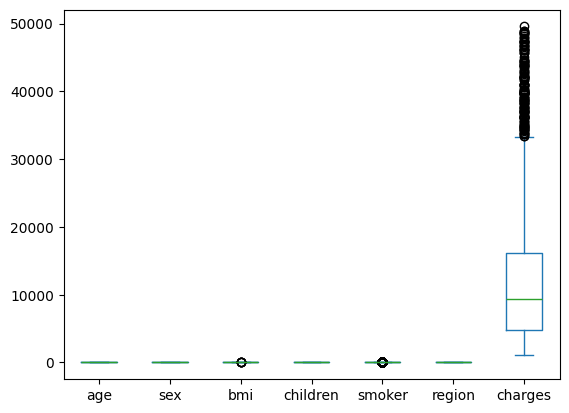

In [268]:
# Visualizing using boxplot
df.plot.box()
plt.show()

# Normalization

In [269]:
# applying normalization xnorm = ( x - xmin ) / ( xmax - xmin )
for column in df.columns:
    df[column] = (df[column] - df[column].min()) / (df[column].max() - df[column].min())

df.head()

,age,sex,bmi,children,smoker,region,charges
0,0.021739,0.0,0.371847,0.00,1.0,1.000000,0.325308
1,0.000000,1.0,0.554656,0.25,0.0,0.666667,0.012458
2,0.217391,1.0,0.530676,0.75,0.0,0.666667,0.068673
3,0.326087,1.0,0.210059,0.00,0.0,0.333333,0.430549
4,0.304348,1.0,0.402367,0.00,0.0,0.333333,0.056649


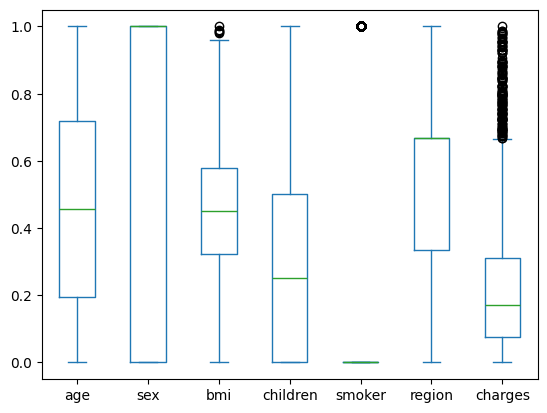

In [270]:
# plotting the results
df.plot.box()
plt.show()

# Standardization

In [271]:
# applying standardization equation: z = (x-mean) / std
for column in df.columns:
    df[column] = (df[column] - df[column].mean()) / df[column].std()

df.head()

,age,sex,bmi,children,smoker,region,charges
0,-1.438227,-1.010141,-0.450763,-0.933013,1.969850,1.343402,0.331339
1,-1.509401,0.989221,0.528884,-0.036838,-0.507273,0.438331,-0.967478
2,-0.797655,0.989221,0.400378,1.755511,-0.507273,0.438331,-0.734100
3,-0.441782,0.989221,-1.317759,-0.933013,-0.507273,-0.466741,0.768255
4,-0.512957,0.989221,-0.287211,-0.933013,-0.507273,-0.466741,-0.784016


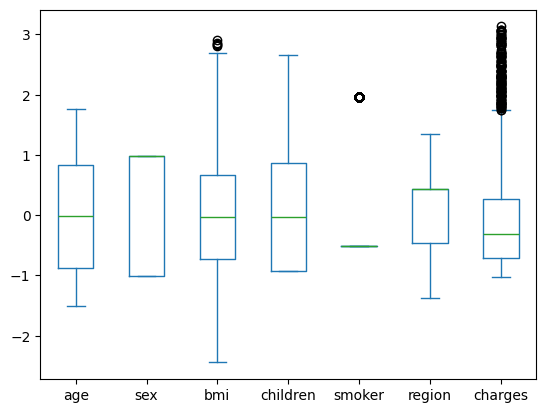

In [272]:
# plotting the results
df.plot.box()
plt.show()

# Sklearn

In [273]:
from sklearn import preprocessing

In [274]:
data = pd.read_csv("./insurance.csv")

data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [275]:
# Encoding by using oneHotEncoder
oe = preprocessing.OneHotEncoder(sparse_output=False)

# Since we use it for encoding categorical and numerical
# Then Covert type of columns to category
data["sex"] = data["sex"].astype("category")
data["smoker"] = data["smoker"].astype("category")
data["region"] = data["region"].astype("category")

# Assigning numerical values and storing it in another columns
data["sex_index"] = data["sex"].cat.codes
data["smoker_index"] = data["smoker"].cat.codes
data["region_index"] = data["region"].cat.codes

# Passing encoded columns
oe_new = pd.DataFrame(oe.fit_transform(data[["sex_index", "smoker_index", "region_index"]]))

# Merge with main
new_df = data.join(oe_new)

new_df.head()

,age,sex,bmi,children,smoker,region,charges,sex_index,smoker_index,region_index,0,1,2,3,4,5,6,7
0,19,female,27.900,0,yes,southwest,16884.92400,0,1,3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,18,male,33.770,1,no,southeast,1725.55230,1,0,2,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
2,28,male,33.000,3,no,southeast,4449.46200,1,0,2,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,33,male,22.705,0,no,northwest,21984.47061,1,0,1,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
4,32,male,28.880,0,no,northwest,3866.85520,1,0,1,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0


# Detection of Outliers

In [276]:
# IQR
# Calculate the upper and lower limits
Q1 = new_df['bmi'].quantile(0.25)
Q3 = new_df['bmi'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

# Create arrays of Boolean values indicating the outlier rows
upper_array = np.where(new_df['bmi']>=upper)[0]
lower_array = np.where(new_df['bmi']<=lower)[0]

# Removing the outliers
new_df.drop(index=upper_array, inplace=True)
new_df.drop(index=lower_array, inplace=True)

new_df.head(10)

,age,sex,bmi,children,smoker,region,charges,sex_index,smoker_index,region_index,0,1,2,3,4,5,6,7
0,19,female,27.900,0,yes,southwest,16884.92400,0,1,3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,18,male,33.770,1,no,southeast,1725.55230,1,0,2,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
2,28,male,33.000,3,no,southeast,4449.46200,1,0,2,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,33,male,22.705,0,no,northwest,21984.47061,1,0,1,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
4,32,male,28.880,0,no,northwest,3866.85520,1,0,1,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
5,31,female,25.740,0,no,southeast,3756.62160,0,0,2,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
6,46,female,33.440,1,no,southeast,8240.58960,0,0,2,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
7,37,female,27.740,3,no,northwest,7281.50560,0,0,1,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
8,37,male,29.830,2,no,northeast,6406.41070,1,0,0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
9,60,female,25.840,0,no,northwest,28923.13692,0,0,1,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


# Normalization


In [279]:
normalized = preprocessing.Normalizer().fit_transform(new_df)


TypeError: Feature names are only supported if all input features have string names, but your input has ['int', 'str'] as feature name / column name types. If you want feature names to be stored and validated, you must convert them all to strings, by using X.columns = X.columns.astype(str) for example. Otherwise you can remove feature / column names from your input data, or convert them all to a non-string data type.

# Standardization

In [280]:
standardized = preprocessing.StandardScaler().fit_transform(new_df)
standardized

TypeError: Feature names are only supported if all input features have string names, but your input has ['int', 'str'] as feature name / column name types. If you want feature names to be stored and validated, you must convert them all to strings, by using X.columns = X.columns.astype(str) for example. Otherwise you can remove feature / column names from your input data, or convert them all to a non-string data type.